## Examples on Image classification methods using the Vision module

Introduction

Gradient saliency map and Grad-CAM (Gradient-weighted Class Activation Mapping) are two methods used for visualizing the importance of different regions in an image for a specific prediction made by a deep learning model.

Gradient saliency map generates a heatmap by computing the gradients of the prediction with respect to the input image, taking the absolute values of the gradients, and then finding the maximum value along a specific axis. This heatmap indicates which pixels in the input image had the most influence on the prediction.

Grad-CAM, on the other hand, generates a heatmap by backpropagating the gradients of the prediction with respect to activations in the final convolutional layer of the model, computing a weight for each activation, and then weighting the activations by their corresponding weights to generate a weighted sum heatmap. This heatmap indicates which regions in the input image are the most important for the prediction.

In summary, gradient saliency map focuses on the input pixels, while Grad-CAM focuses on the activations in the final convolutional layer of the model.


In [9]:
import sys
sys.path.append("/home/stylianos/Desktop/GIT/MDML/src/")

In [15]:
# Import libraries
from mdml.Vision import SaliencyMap, GradCam
import tensorflow.keras as keras
from keras.applications.densenet import decode_predictions
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Load model
vgg = keras.applications.VGG16()

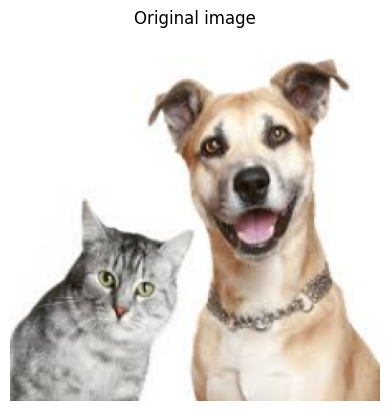

In [18]:
# Fetch an image
img = np.array(keras.utils.load_img('/home/stylianos/Desktop/ims.jpeg'))
img =  cv2.resize(img, (224, 224)) # recize img so that fits the model input size

#Plot
plt.title('Original image')
plt.imshow(img)
plt.axis('off')
plt.show()

In [19]:
# Top 5 preditions of the model 
preds = vgg.predict(np.expand_dims(img, axis=0))
dec_preds = decode_predictions(preds, top=5)[0]
dec_preds

1/1 [==============================] - 0s 344ms/step


[('n02109961', 'Eskimo_dog', 0.27591792),
 ('n02124075', 'Egyptian_cat', 0.23035124),
 ('n02091467', 'Norwegian_elkhound', 0.13118699),
 ('n02110185', 'Siberian_husky', 0.10441807),
 ('n02093428', 'American_Staffordshire_terrier', 0.045053273)]

In [20]:
index_top_5_pred = np.argsort(preds[0])[::-1][:5]

In [26]:
grad_cam = GradCam(vgg).compute_map(img, n = 0)


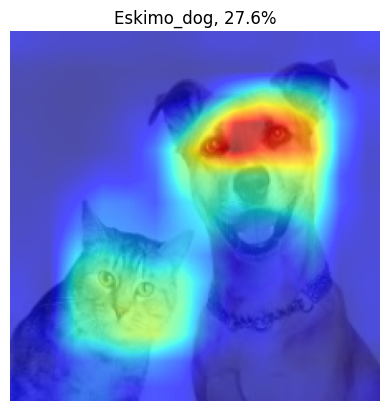

In [27]:
plt.title(f'{dec_preds[0][1]}, {dec_preds[0][2]*100:.1f}%')
plt.imshow(img) 
plt.imshow(grad_cam, cmap='jet', alpha=0.7)
plt.axis('off')
plt.show()

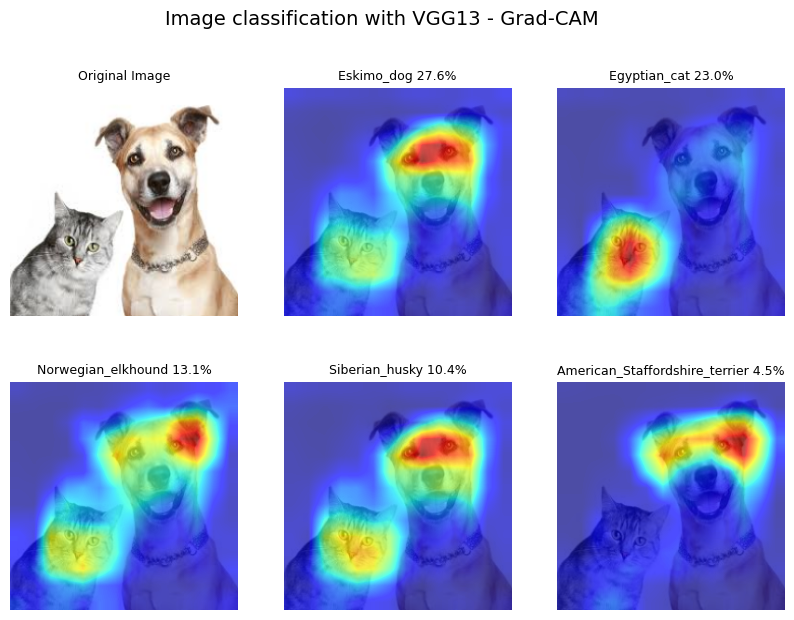

In [29]:
plt.figure(figsize=(10, 7))
ax = plt.subplot(2, 3, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Original Image', fontsize = 9)

for i,index in enumerate(index_top_5_pred):

    title = decode_predictions(preds, top=5)[0][i][1]
    percent = decode_predictions(preds, top=5)[0][i][2]
    grad_cam = GradCam(vgg).compute_map(img, n = i)
    i +=1
    ax = plt.subplot(2, 3, i + 1)
    
    plt.imshow(img) 
    plt.imshow(grad_cam, cmap='jet', alpha=0.7)
    plt.title(f'{title} {percent*100:.1f}%', fontsize = 9)
    plt.axis('off')
plt.suptitle('Image classification with VGG13 - Grad-CAM ', fontsize = 14)
plt.show()

In [30]:
sal = SaliencyMap(vgg, img)
grad_sal_map = sal.gradient_saliency_map()

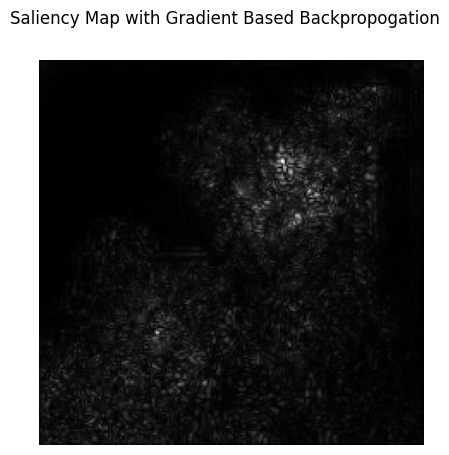

In [31]:
plt.figure(figsize=(5, 5))
plt.suptitle('Saliency Map with Gradient Based Backpropogation', fontsize = 12)
plt.imshow(grad_sal_map, cmap= 'gray')
plt.clim(0, 1)
# plt.colorbar()
plt.axis('off')
plt.show()

Citations:

Simonyan, Karen, Andrea Vedaldi, and Andrew Zisserman. “Deep inside convolutional networks: Visualising image classification models and saliency maps.” arXiv preprint arXiv:1312.6034 (2013).

Simonyan, Karen, and Andrew Zisserman. “Very deep convolutional networks for large-scale image recognition.” arXiv preprint arXiv:1409.1556 (2014).

Selvaraju, R. R., Cogswell, M., Das, A., Vedantam, R., Parikh, D., & Batra, D. (2017). Grad-cam: Visual explanations from deep networks via gradient-based localization. In Proceedings of the IEEE international conference on computer vision (pp. 618-626).

https://colab.research.google.com/drive/1rxmXus_nrGEhxlQK_By38AjwDxwmLn9S?usp=sharing#scrollTo=2orhPMN2Wxbq

https://towardsdatascience.com/practical-guide-for-visualizing-cnns-using-saliency-maps-4d1c2e13aeca

